# Project: Investigate a Dataset (TMDb Movie Data)

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

# Note:
Before each cell i will write the documentation of it,
After the cell, i will write the conclusions.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Exploring Dataset

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


## Explore columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are some columns that won't help us in the analysis so they need to be dropped, like {id, imdb_db, homepage, tagline, keywords, overview, budget_adj, revenue_adj, production_companies}

# Check for duplicates

In [6]:
df.duplicated().sum()

1

We see that it only contains 1 duplicate record, so we can easily drop it

# Check for zero values in budget or revenue columns

In [15]:
df.query('budget == 0').shape

(5696, 21)

There are 5696 zero budget records, as it's an important column so it will affect the analysis, so i will remove these records


# Data Cleaning 

Remove un-necessary columns

In [16]:
df.drop(['id', 'imdb_id','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline',
                              'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 849.0+ KB


We see that there are some null values in our dataset which need to be handled

## Check for duplicates

In [19]:
df.duplicated().sum()

1

It's just one duplicate row so i can drop it

In [21]:
df.drop_duplicates(inplace = True)

## Check for zero values in the budget and revenue column

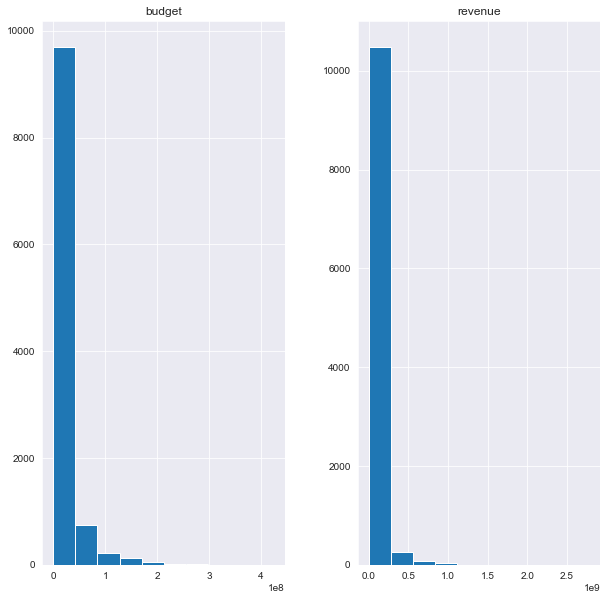

In [28]:
df[['budget', 'revenue']].hist(figsize = (10,10));

In [24]:
df.query('budget == 0').shape

(5696, 10)

Oh we have alot of zero value budget movies, this will affect our analysis, so i will drop these rows
This is done by converting the zeros to NaN and then drop them.

In [29]:
df.budget = df.budget.replace(0, np.NaN)

In [30]:
df.dropna(inplace = True)

Check the dataset meta data after these modifications

In [31]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


### We need to change the release_date to datetime data type, as we may need it in our analysis

In [32]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [33]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


Now let's plot some histograms to view our data after cleaning it.

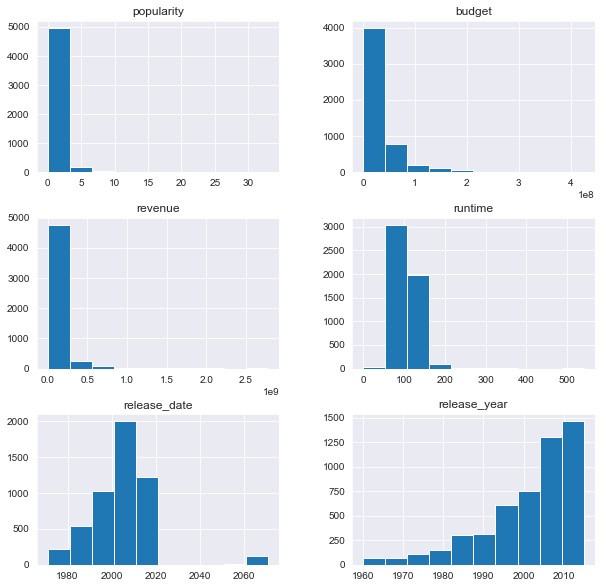

In [34]:
df.hist(figsize = (10,10));

what is that in the release date histogram, let's take a deeper view

In [35]:
df[df['release_date'].dt.year > 2020]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
9719,3.309196,12000000.0,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,2068-04-05,1968
9720,1.152937,5800000.0,33395426,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,Franklin J. Schaffner,112,Adventure|Science Fiction|Mystery,2068-02-07,1968
9721,1.058272,114000.0,0,Night of the Living Dead,Duane Jones|Judith O'Dea|Karl Hardman|Marilyn ...,George A. Romero,96,Horror,2068-10-01,1968
9724,0.786854,5500000.0,42300873,Bullitt,Steve McQueen|Jacqueline Bisset|Robert Vaughn|...,Peter Yates,113,Action|Crime|Drama|Thriller,2068-10-17,1968
9727,0.724527,3200000.0,33395426,Rosemary's Baby,Mia Farrow|John Cassavetes|Ruth Gordon|Sidney ...,Roman Polanski,136,Horror|Drama|Mystery,2068-06-12,1968
...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000.0,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,1966
10841,0.264925,75000.0,0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,Monte Hellman,82,Western,2066-10-23,1966
10848,0.207257,5115000.0,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,2066-08-24,1966
10855,0.141026,700000.0,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,90,Comedy|Family|Mystery|Romance,2066-01-20,1966


__After some research i found that these movies {2001: space odyssey, planet of the apes} were released in 1968 not 2068__

In [43]:
year_mask = df['release_date'].dt.year>2020
#df[year_mask].release_date.dt.year 
df.release_year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10835    1966
10841    1966
10848    1966
10855    1966
10865    1966
Name: release_year, Length: 5153, dtype: int64

But wait, the release_year column is correct, so i will drop the release_date column as it might contain wrong information, that was confusing but i learnt to search on my data to validate it

In [44]:
df.drop('release_date', axis = 1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5153 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      5153 non-null   float64
 1   budget          5153 non-null   float64
 2   revenue         5153 non-null   int64  
 3   original_title  5153 non-null   object 
 4   cast            5153 non-null   object 
 5   director        5153 non-null   object 
 6   runtime         5153 non-null   int64  
 7   genres          5153 non-null   object 
 8   release_year    5153 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 402.6+ KB


In [46]:
df.describe()

,popularity,budget,revenue,runtime,release_year
count,5153.000000,5.153000e+03,5.153000e+03,5153.000000,5153.000000
mean,0.994921,3.082824e+07,8.053158e+07,107.170774,2001.249757
std,1.330537,3.893199e+07,1.596748e+08,22.694996,11.767477
min,0.001117,1.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.349751,6.000000e+06,0.000000e+00,93.000000,1996.000000
50%,0.626306,1.750000e+07,2.112622e+07,103.000000,2005.000000
75%,1.157930,4.000000e+07,9.000000e+07,117.000000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,540.000000,2015.000000


__I think now the data is clean, we can continue to the EDA phase__

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



__let's add `profit` column to assist us in the analysis process__

In [47]:
df['profit'] = df['revenue'] - df['budget']

In [48]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year,profit
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.363529e+09


### Question1: Most Profitable Movie

In [71]:
most_profitable = df[df.profit == df.profit.max()]

In [72]:
title = most_profitable.original_title.values[0];
profit = most_profitable.profit.values[0];
print('The most profitable movie is {} with profit = {}'.format(title, profit ))

The most profitable movie is Avatar with profit = 2544505847.0


__It was really an amazing movie!, it deserved that profit__

### Question2: Least profitable Movie

In [76]:
least_profitable = df[df.profit == df.profit.min()]
title = least_profitable.original_title.values[0];
profit = least_profitable.profit.values[0];
print('The least profitable movie is {} with profit = {}'.format(title, profit ))

The least profitable movie is The Warrior's Way with profit = -413912431.0


__Oh!, that's a big loss for them__

### Question3: Top 10 Movies

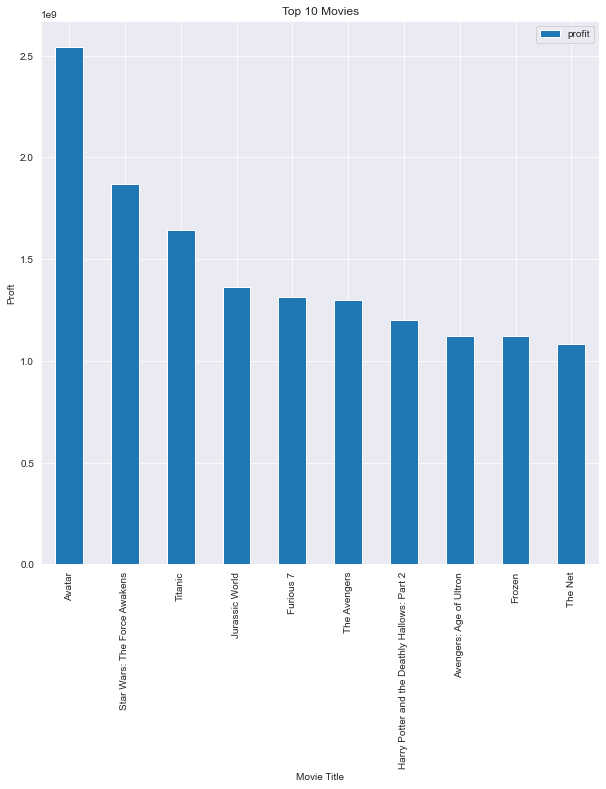

In [127]:
top_10 = df.sort_values(by =['profit'], ascending = False)[:10]
df_10 = pd.DataFrame()
df_10['title'] = top_10.original_title
df_10['profit'] = top_10.profit
df_10.plot(kind = 'bar', x='title', y = 'profit', figsize = (10,10))
plt.title('Top 10 Movies')
plt.xlabel('Movie Title')
plt.ylabel('Proft');

__Lovely! My Favourite movies in one graph__

### Question4: Profit by year

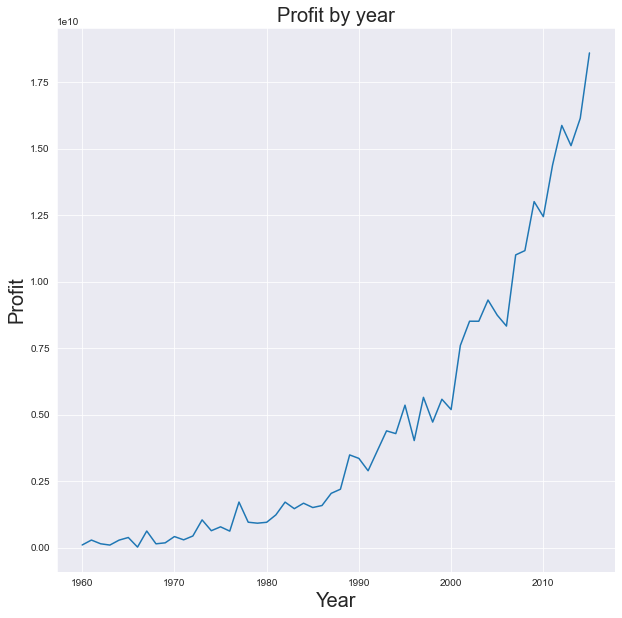

In [129]:
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.plot(figsize = (10,10))
plt.title('Profit by year', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Profit', fontsize = 20);

As we can see the trend, we can conclude that the profit increases exponentially!!

### Question4: Which genres are most popular?

In [132]:
df.genres

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10835           Action|Adventure|Drama|War|Romance
10841                                      Western
10848                    Adventure|Science Fiction
10855                Comedy|Family|Mystery|Romance
10865                                       Horror
Name: genres, Length: 5153, dtype: object

In [142]:
genres = df['genres'].str.cat(sep = '|')
genres = pd.Series(genres.split('|'))
count = genres.value_counts(ascending = True)
count

TV Movie              9
Foreign              33
Documentary          55
Western              74
War                 155
Music               166
History             182
Animation           257
Mystery             440
Fantasy             507
Family              520
Science Fiction     701
Horror              765
Crime               823
Romance             860
Adventure           906
Action             1428
Thriller           1640
Comedy             1737
Drama              2312
dtype: int64

Extract The count for each genre 

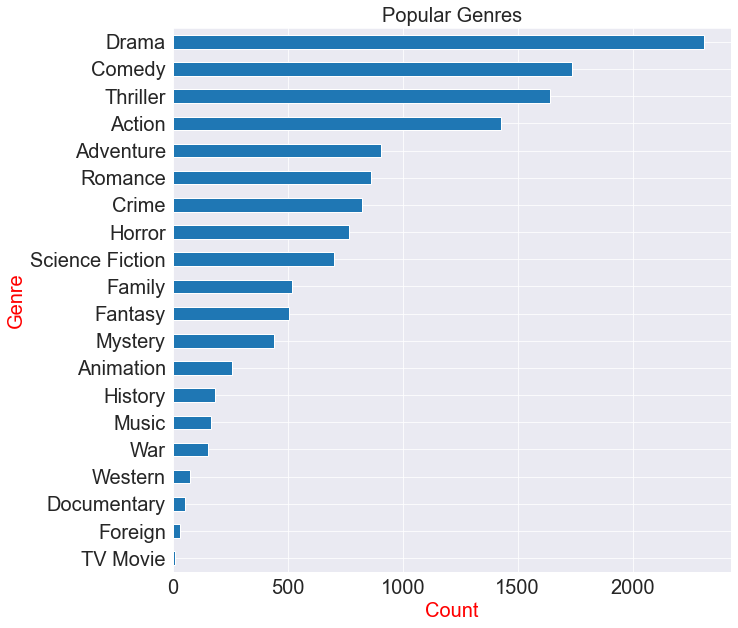

In [147]:
count.plot(kind = 'barh', figsize = (10,10), fontsize= 20)
plt.title('Popular Genres', fontsize= 20)
plt.ylabel('Genre', fontsize= 20, color ='red')
plt.xlabel('Count', fontsize= 20, color = 'red');

__Looks like people loves to watch drama movies__

### Question5: Top 10 directors

In [157]:
directors = df['director'].str.cat(sep = '|')
directors = pd.Series(directors.split('|'))
count_director = directors.value_counts()
count_director = count_director.sort_values(ascending = False)[:10].sort_values()
count_director

Oliver Stone         17
Wes Craven           18
Robert Rodriguez     18
Tim Burton           18
Steven Soderbergh    21
Martin Scorsese      22
Ridley Scott         22
Clint Eastwood       24
Woody Allen          26
Steven Spielberg     30
dtype: int64

__Notice the `.sort_valeus()` i used this technique to help me visualize the directors correctly so the most famous is on the top__

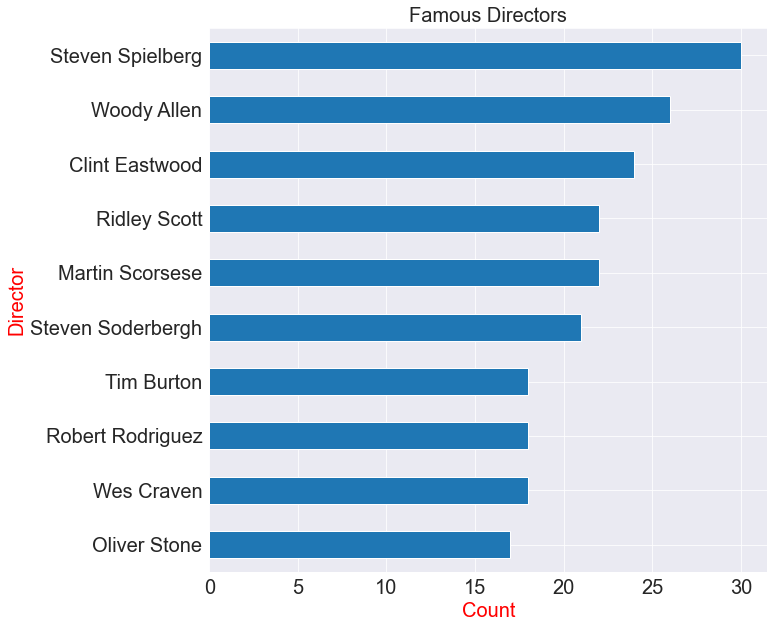

In [159]:
count_director.plot(kind = 'barh', figsize = (10,10), fontsize= 20)
plt.title('Famous Directors', fontsize= 20)
plt.ylabel('Director', fontsize= 20, color ='red')
plt.xlabel('Count', fontsize= 20, color = 'red');

__Looks like Mr. Steven is successful in his career, well done!__

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])